<h1><center> NEW_YORK CITY AIRBNB PRICE PREDICTION</center></h1>



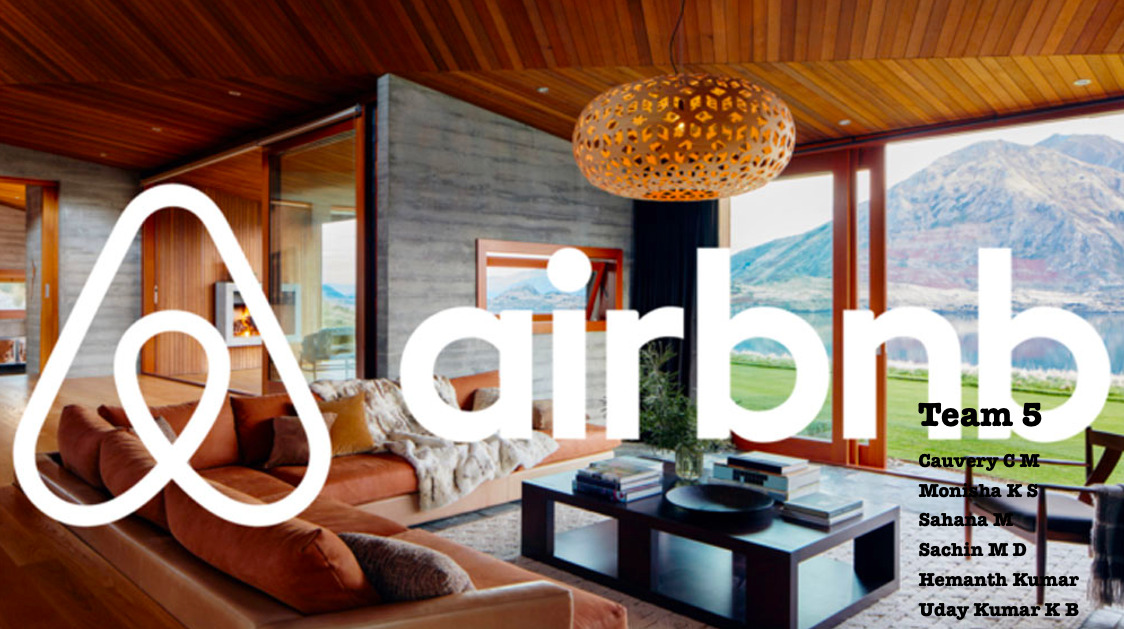

In [1]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(filename= "Air_BNB.jpeg", width=2500, height=500)

Airbnb is a paid community platform for renting and booking private accommodation founded in 2008. Airbnb allows individuals to rent all or part of their own home as extra accommodation. The site offers a search and booking platform between the person offering their accommodation and the vacationer who wishes to rent it. It covers more than 1.5 million advertisements in more than 34,000 cities and 191 countries. From creation, inaugust 2008, until June 2012, more than 10 million nights have been booked on Airbnb.

### About the dataset (Adult Income Data)

**id:** listing ID

**name:** name of the listing

**host_id:** host ID

**host_name:** name of the host

**neighbourhood_group:** location

**neighbourhood:** area

**latitude:** latitude coordinateslatitude: latitude coordinates

**longitude:** longitude coordinates

**room_type:** listing space type

**price:** price in dollars

**minimum_nights:** amount of nights minimum

**number_of_reviews:** number of reviews

**last_review:** latest review

**reviews_per_month:** number of reviews per month

**calculated_host_listings_count:** amount of listing per host avail

## Problem Statement

Although Airbnb provides hosts with general guidance, there are no easy to access methods to determine the best price to rent out a space. There is third-party software available, but for a hefty price.
One method could be to find a few listings that are similar to the place that will be up for rent, average the listed prices and set our price to this calculated average price. However, with the market being so dynamic, we would probably be looking to update the price regularly and this method can become tedious.
Moreover, this may not be very accurate, as we are not taking into account other important factors that may give us a comparative advantage over other listings around us. This could be property characteristics such as number of rooms, type of room,location ,neighbourhood of the property and extra services on offer.

The aim of this project is to propose a data-driven solution, by using machine learning to predict rental price.

## Table of Contents

1. **[Import Libraries](#import_lib)**
2. **[Read Data](#Read_Data)**
3. **[Exploratory Data Analysis](#eda)**
    - 3.1 - [Understand the Data](#Data_Understanding)
        - 3.1.1 - [Data Wrangling & Cleaning](#cleaning)
    - 3.2 - [Data Analysis and Visualisation](#Data_Analysis)
    - 3.3 - [Encoding Data and Outlier Removal](#Data_Encoding)
        
4. **[Linear Regression (OLS)](#LinearRegression)**
    - 4.1 - [Multiple Linear Regression - Full Model - with Log Transformed Dependent Variable (OLS)](#withLog)
    - 4.2 - [Multiple Linear Regression - Full Model - without Log Transformed Dependent Variable (OLS)](#withoutLog)
    - 4.3 - [Fine Tune Linear Regression Model (OLS)](#Finetuning)
      - 4.3.1 - [Linear Regression after Removing Insignificant Variable (OLS)](#RemovingInsignificantVariable)
      - 4.3.2 - [Check the Assumptions of Linear Regression](#Assumptions)
          - 4.3.2.1 - [Detecting Autocorrelation](#Autocorrelation)
          - 4.3.2.2 - [Detecting Heteroskedasticity](#Heteroskedasticity)
          - 4.3.2.3 - [Linearity of Residuals](#Linearity_of_Residuals)
          - 4.3.2.4 - [Normality of Residuals](#Normality_of_Residuals)
      - 4.3.3 - [Linear Regression after Removing Insignificant Variable (OLS) - Scaled Data](#RemovingInsignificantVariable_scaleddata)
      - 4.3.4 - [Linear Regression with Interaction (OLS)](#Interaction)
5. **[Regularization (OLS)](#regularization)**
    - 5.1 - [Ridge Regression Model (OLS)](#Ridge_Regression)
    - 5.2 - [Linear Regression with SGD (sklearn)](#LinearRegressionwithStochasticGradientDescent)
6. **[Conclusion and Interpretation](#rmse_and_r-squared)**    

<a id='import_lib'></a>
## 1. Import libraries
Here we are importing all the libraries required for the case study.

In [2]:
from warnings import filterwarnings
filterwarnings('ignore')

from scipy.stats import norm
# 'Os' module provides functions for interacting with the operating system 
import os

# 'Pandas' is used for data manipulation and analysis
import pandas as pd 

# 'Numpy' is used for mathematical operations on large, multi-dimensional arrays and matrices
import numpy as np

# 'Matplotlib' is a data visualization library for 2D and 3D plots, built on numpy
import matplotlib.pyplot as plt
%matplotlib inline

# 'Seaborn' is based on matplotlib; used for plotting statistical graphics
import seaborn as sns

# 'Scikit-learn' (sklearn) emphasizes various regression, classification and clustering algorithms
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet

# 'Statsmodels' is used to build and analyze various statistical models
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.tools.eval_measures import rmse
from statsmodels.compat import lzip
from statsmodels.graphics.gofplots import ProbPlot

# 'SciPy' is used to perform scientific computations
from scipy.stats import f_oneway
from scipy.stats import jarque_bera
from scipy import stats

<a id='Read_Data'></a>
## 2. Read Data

In [3]:
df = pd.read_csv('AB_NYC_2019.csv')

In [4]:
df_copy = df.copy()
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


<a id='eda'></a>
## 3. Exploratory Data Analysis

<a id='Data_Understanding'></a>
## <font color='darkblue'>3.1. Understand The Data</font> 

In [5]:
df.shape

(48895, 16)

<a id='cleaning'></a>
### <font color='darkblue'>3.1.1. Data Wrangling and Cleaning</font> 

In [6]:
# Understanding types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
id                                48895 non-null int64
name                              48879 non-null object
host_id                           48895 non-null int64
host_name                         48874 non-null object
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       38843 non-null object
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64

#### <font color='darkblue'>Inference:</font>

Here we have almost 48.8k rows with 16 columns for each. It is composed of 3 float types, 7 int types and 6 object types.

In [7]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

#### <font color='darkblue'>Inference:</font>

So, we can see there are around 10k null values in the last_review and review_per_month columns and a very few null values in name and host_name.

In [8]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


#### <font color='darkblue'>Inference:</font>

-> From this we can see the mean price to be around 152 dollars. 

-> Average availablity of an airbnb around a year is 112 days.


In [9]:
# Insight about unique values
df.nunique()

id                                48895
name                              47905
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

#### <font color='darkblue'>Inference:</font>

Notable that we have 5 locations in dataset and 3 room types.

In [10]:
# Making sure if any duplicatd values.
df.duplicated().sum()

0

#### <font color='darkblue'>Inference:</font>

We do not have any duplicate rows in our dataset.

<a id='Data_Analysis'></a>
## <font color='darkblue'>3.2. Data Analysis and Visualization</font> 

### <font color='darkblue'>Host ID</font>

In [11]:
df.host_id.value_counts().iloc[:5]

219517861    327
107434423    232
30283594     121
137358866    103
12243051      96
Name: host_id, dtype: int64

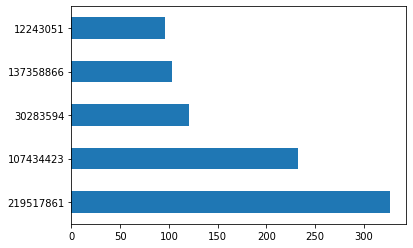

In [12]:
df.host_id.value_counts().iloc[:5].plot(kind = 'barh')

#### <font color='darkblue'>Inference:</font>

We can observe that the highest times transaction done by a customer is 327 in the year 2019.

### <font color='darkblue'>Room Type</font>

In [13]:
# we noted that the room_type is only of 3 particular types.
df['room_type'].value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

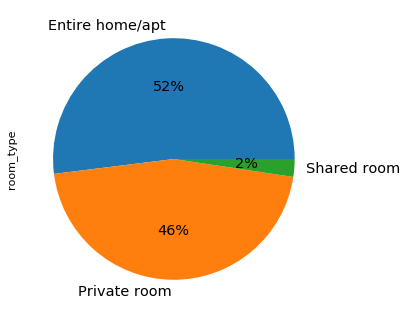

In [14]:
fig = plt.figure(figsize=(5,5), dpi=80)
df['room_type'].value_counts().plot(kind='pie',  autopct='%1.0f%%', startangle=360, fontsize=13)

#### <font color='darkblue'>Inference:</font>

Intresting to note that in our dataset, around 25k people (52%) choose to use a house while 22k(46%) for a private room. Only 1k(2%) people choose a shared room. This could mean more people who use airbnb , use it with family maybe for tours,visits,etc... 

### <font color='darkblue'>Neighbourhood Groups - Location</font>

In [15]:
# There are 5 particular neighbourhood_group, which means 5 unique locations.
df['neighbourhood_group'].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

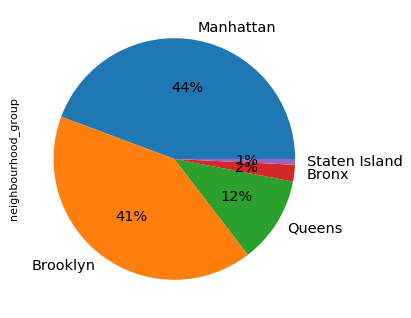

In [16]:
fig = plt.figure(figsize=(5,5), dpi=80)
df['neighbourhood_group'].value_counts().plot(kind='pie',  autopct='%1.0f%%', startangle=360, fontsize=13)

#### <font color='darkblue'>Inference:</font>

Manhattan is the city where most Airbnb transactions have occured with 44% of entire dataset. The least happend in Staten Island only 1%. Brooklyn consisted on 41% of transactions with 12% Queens and 2 % in Bronx.

### <font color='darkblue'>Neighbourhoods:</font>

In [17]:
df['neighbourhood'].value_counts().iloc[:5]

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Name: neighbourhood, dtype: int64

In [18]:
df['neighbourhood'].unique()

array(['Kensington', 'Midtown', 'Harlem', 'Clinton Hill', 'East Harlem',
       'Murray Hill', 'Bedford-Stuyvesant', "Hell's Kitchen",
       'Upper West Side', 'Chinatown', 'South Slope', 'West Village',
       'Williamsburg', 'Fort Greene', 'Chelsea', 'Crown Heights',
       'Park Slope', 'Windsor Terrace', 'Inwood', 'East Village',
       'Greenpoint', 'Bushwick', 'Flatbush', 'Lower East Side',
       'Prospect-Lefferts Gardens', 'Long Island City', 'Kips Bay',
       'SoHo', 'Upper East Side', 'Prospect Heights',
       'Washington Heights', 'Woodside', 'Brooklyn Heights',
       'Carroll Gardens', 'Gowanus', 'Flatlands', 'Cobble Hill',
       'Flushing', 'Boerum Hill', 'Sunnyside', 'DUMBO', 'St. George',
       'Highbridge', 'Financial District', 'Ridgewood',
       'Morningside Heights', 'Jamaica', 'Middle Village', 'NoHo',
       'Ditmars Steinway', 'Flatiron District', 'Roosevelt Island',
       'Greenwich Village', 'Little Italy', 'East Flatbush',
       'Tompkinsville', 'Asto

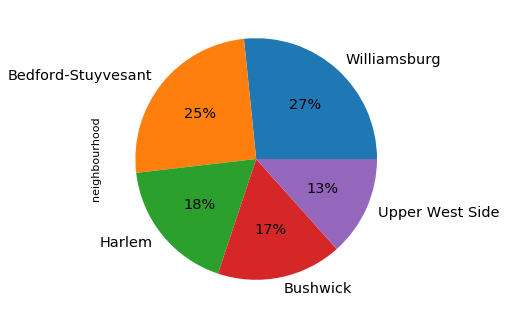

In [19]:
fig = plt.figure(figsize=(5,5), dpi=80)
df['neighbourhood'].value_counts().iloc[:5].plot(kind='pie',  autopct='%1.0f%%', startangle=360, fontsize=13)

#### <font color='darkblue'>Inference:</font>

We can see that Williamsburg is the hottest area of transaction followed by Bedford-Stuyvesant.

This pie-chart shows the top 5 areas by percentage in the dataset.

### <font color='darkblue'>Price:</font>

In [20]:
df.price.value_counts().iloc[:10]

100    2051
150    2047
50     1534
60     1458
200    1401
75     1370
80     1272
65     1190
70     1170
120    1130
Name: price, dtype: int64

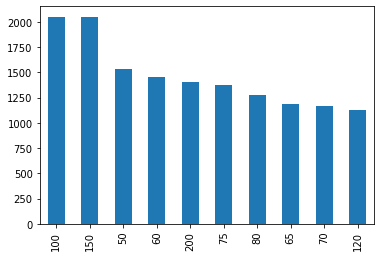

In [21]:
df.price.value_counts().iloc[:10].plot(kind = 'bar')

#### <font color='darkblue'>Inference:</font>

Almost 2k+ airbnb's has a price of 100 dollars and 150 dollars each respectively.

1.5k airbnb's have around 50 dollars price.

In [22]:
df.price.describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

#### <font color='darkblue'>Inference:</font>

The average pricing is around 152 dollars.

50% of data has price greater than 106 dollars.

The costliest airbnb has around 10k dollars as price.

In [23]:
df[df['price'] == 10000.000000]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
9151,7003697,Furnished room in Astoria apartment,20582832,Kathrine,Queens,Astoria,40.76810,-73.91651,Private room,10000,100,2,2016-02-13,0.04,1,0
17692,13894339,Luxury 1 bedroom apt. -stunning Manhattan views,5143901,Erin,Brooklyn,Greenpoint,40.73260,-73.95739,Entire home/apt,10000,5,5,2017-07-27,0.16,1,0
29238,22436899,1-BR Lincoln Center,72390391,Jelena,Manhattan,Upper West Side,40.77213,-73.98665,Entire home/apt,10000,30,0,NaN,NaN,1,83


#### <font color='darkblue'>Inference:</font>

We have 3 airbnbs with 10k per night luxury stay, one private room and 2 home stay.

### <font color='darkblue'>Minimum Nights</font>

In [24]:
df['minimum_nights'].value_counts()

1       12720
2       11696
3        7999
30       3760
4        3303
        ...  
42          1
186         1
265         1
1000        1
364         1
Name: minimum_nights, Length: 109, dtype: int64

In [25]:
for i in range(1,11):
  print("Number of nights: ",i)
  print("Amount of trasactions:",len(df[df['minimum_nights'] == i]))

Number of nights:  1
Amount of trasactions: 12720
Number of nights:  2
Amount of trasactions: 11696
Number of nights:  3
Amount of trasactions: 7999
Number of nights:  4
Amount of trasactions: 3303
Number of nights:  5
Amount of trasactions: 3034
Number of nights:  6
Amount of trasactions: 752
Number of nights:  7
Amount of trasactions: 2058
Number of nights:  8
Amount of trasactions: 130
Number of nights:  9
Amount of trasactions: 80
Number of nights:  10
Amount of trasactions: 483


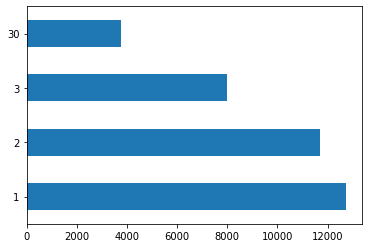

In [26]:
df['minimum_nights'].value_counts().iloc[:4].plot(kind = 'barh')

#### <font color='darkblue'>Inference:</font>

We can observe that most of almost 12k people used 1 night stay in airbnb.

11k people choose 2 night stay while 7k choose 3 night stay.

Almost 3.7k stayed upto a month.

### <font color='darkblue'>Number of reviews</font>

In [27]:
df['number_of_reviews'].value_counts()

0      10052
1       5244
2       3465
3       2520
4       1994
       ...  
404        1
436        1
388        1
341        1
607        1
Name: number_of_reviews, Length: 394, dtype: int64

#### <font color='darkblue'>Inference:</font>

10k airbnbs dont have any reviews.

5.2k has around 1 review and the maximum number of reviews is 607 which only 1 airbnb has.

In [28]:
df[df['number_of_reviews'] == 607]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2031,903972,Great Bedroom in Manhattan,4734398,Jj,Manhattan,Harlem,40.82085,-73.94025,Private room,49,1,607,2019-06-21,7.75,3,293


#### <font color='darkblue'>Inference:</font>

Great Bedroom in Manhattan gets the highest reviews and it costs around 69 dollars.

### <font color='darkblue'>Availability</font>

In [29]:
df['availability_365'].value_counts()

0      17533
365     1295
364      491
1        408
89       361
       ...  
195       26
196       24
183       24
181       23
202       20
Name: availability_365, Length: 366, dtype: int64

Around 1.3k airbnbs have 365 days availablity and rest doesnt.


In [30]:
df[df['availability_365'] == 365].describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,1.295000e+03,1.295000e+03,1295.000000,1295.000000,1295.000000,1295.00000,1295.000000,841.000000,1295.000000,1295.0
mean,1.940195e+07,8.554698e+07,40.729014,-73.943275,250.769884,19.60000,10.220849,0.832545,13.158301,365.0
std,1.197265e+07,8.786960e+07,0.057781,0.059799,550.497373,65.05093,22.095983,1.112493,36.224171,0.0
min,2.539000e+03,2.787000e+03,40.507080,-74.242850,20.000000,1.00000,0.000000,0.010000,1.000000,365.0
25%,8.725256e+06,8.931349e+06,40.687990,-73.983210,72.000000,1.00000,0.000000,0.130000,1.000000,365.0
50%,2.065068e+07,4.634351e+07,40.730990,-73.954270,125.000000,3.00000,2.000000,0.410000,2.000000,365.0
75%,3.027040e+07,1.565055e+08,40.762095,-73.921715,225.000000,30.00000,10.000000,1.000000,7.000000,365.0
max,3.648315e+07,2.733930e+08,40.893740,-73.721730,9999.000000,1250.00000,183.000000,8.940000,327.000000,365.0


#### <font color='darkblue'>Inference:</font>

Costliest airbnb with 365 days availablity costs around 10k dollars with average of 250 dollars.

### <font color='darkblue'>Reviews per month</font>

In [31]:
df_copy[df_copy['reviews_per_month'] > 1].reviews_per_month.value_counts().sum()                 

15908

15.9k reviews were above 1.


In [32]:
df[df['reviews_per_month'] > 1]['reviews_per_month'].value_counts().iloc[:5]            

2.00    406
3.00    222
4.00    130
1.15     90
1.05     88
Name: reviews_per_month, dtype: int64

Above 1, around 406 airbnbs have 2 reviews per month, 222 with 3 and 130 with 4.



In [33]:
df['reviews_per_month'].max()

58.5

In [34]:
df_copy[df['reviews_per_month'] == 58.5]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
42075,32678719,Enjoy great views of the City in our Deluxe Room!,244361589,Row NYC,Manhattan,Theater District,40.75918,-73.98801,Private room,100,1,156,2019-07-07,58.5,9,299


#### <font color='darkblue'>Inference:</font>

Enjoy great views in Manhattan has the highest reviews per month. They offer Private room and is worth 100 dollars a night. 

### <font color='darkblue'>Calculate host listing</font>

In [35]:
df.calculated_host_listings_count.value_counts().iloc[:5]

1    32303
2     6658
3     2853
4     1440
5      845
Name: calculated_host_listings_count, dtype: int64

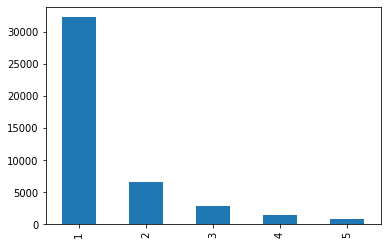

In [36]:
df.calculated_host_listings_count.value_counts().iloc[:5].plot(kind = 'bar')

#### <font color='darkblue'>Inference:</font>

Most hosts used the listings only once that is around 32.3k and 6.6k around 2 times.

In [37]:
df.calculated_host_listings_count.describe()

count    48895.000000
mean         7.143982
std         32.952519
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        327.000000
Name: calculated_host_listings_count, dtype: float64

#### <font color='darkblue'>Inference:</font>

On an average, a host has used listings 7 times.

Maximum times being 327.

### <font color='darkblue'>Bivariate Analysis</font>

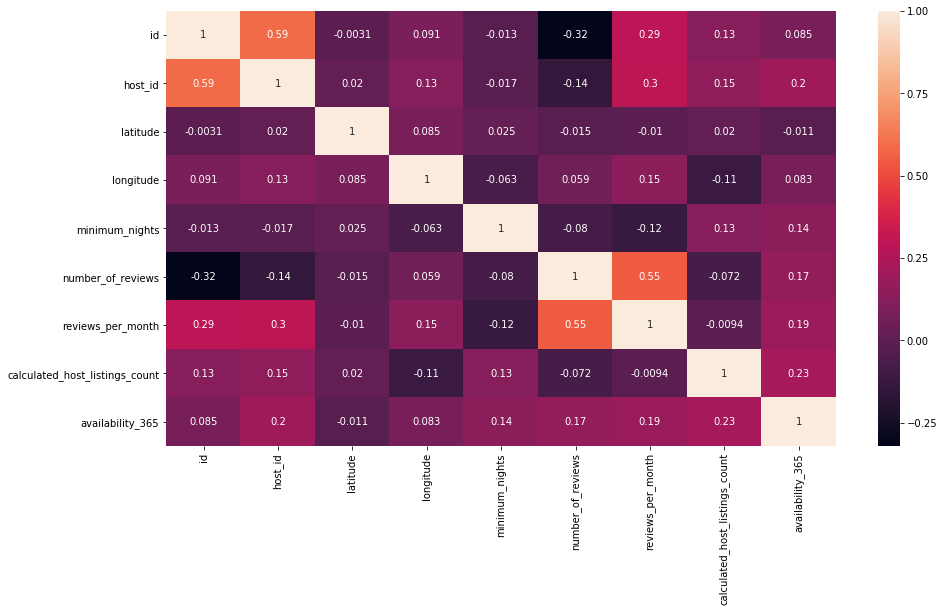

In [38]:
corr = df.corr().drop(["price"], axis = 1)
corr = corr.drop(["price"], axis = 0)
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)

#### Latitude and Longitude with location

In [39]:
df['neighbourhood_group'].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

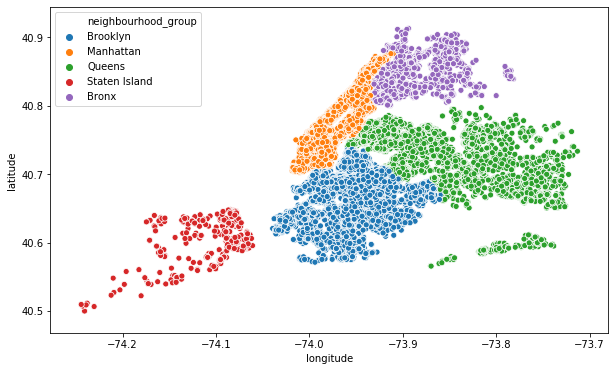

In [40]:
plt.figure(figsize=(10,6))
sns.scatterplot(df.longitude,df.latitude,hue=df.neighbourhood_group)

#### <font color='darkblue'>Inference:</font>

This shows us the dataset distribution in NewYork city with respect to latitude and longitude.

#### Latitude and Longitude with room type

In [41]:
df['room_type'].value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

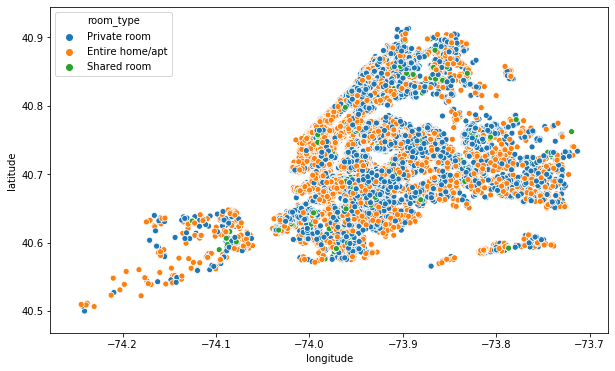

In [42]:
plt.figure(figsize=(10,6))
sns.scatterplot(df.longitude,df.latitude,hue=df.room_type)

#### Latitude and Longitude with room availability for 365 days

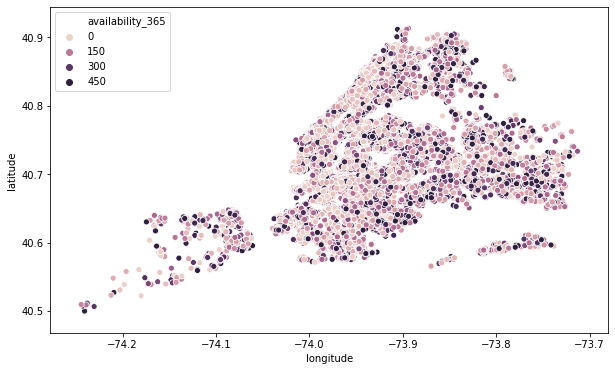

In [43]:
plt.figure(figsize=(10,6))
sns.scatterplot(df_copy.longitude,df_copy.latitude,hue=df_copy.availability_365)

### <font color='darkblue'>Plots</font>

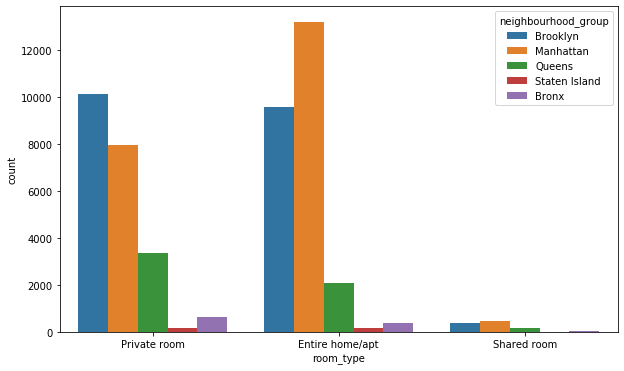

In [44]:
plt.figure(figsize=(10,6))
sns.countplot(data = df, x = 'room_type', hue = 'neighbourhood_group')

#### <font color='darkblue'>Inference:</font>

Home service seems to be most used by people and the highest in Manhattan. This is also the highest service used across New York City.

In Brooklyn, Private rooms were more used.

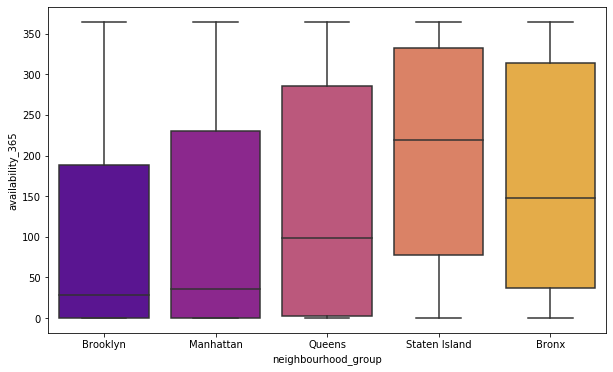

In [45]:
plt.figure(figsize=(10,6))
ax = sns.boxplot(data=df_copy, x='neighbourhood_group',y='availability_365',palette='plasma')

#### <font color='darkblue'>Inference:</font>

Staten Island has th highest average airbnb availablity. 

Text(0.5, 1.0, 'Density and distribution of prices for each neighberhood_group')

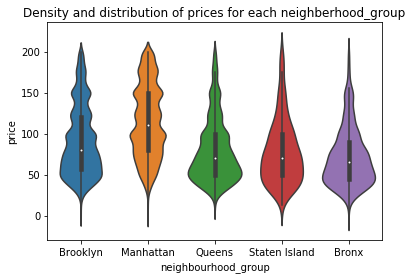

In [46]:
v2=sns.violinplot(data=df[df.price < 200], x='neighbourhood_group', y='price')
v2.set_title('Density and distribution of prices for each neighberhood_group')

#### <font color='darkblue'>Inference:</font>

Manhattan airbnb's has the highest average price.

In [47]:
df['neighbourhood'].value_counts().iloc[:10]

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Hell's Kitchen        1958
East Village          1853
Upper East Side       1798
Crown Heights         1564
Midtown               1545
Name: neighbourhood, dtype: int64

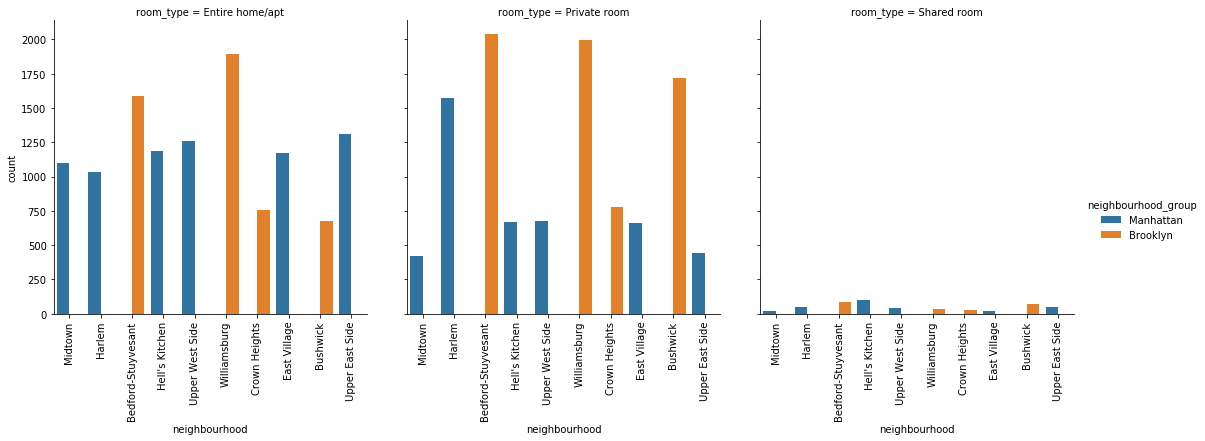

In [48]:
neighb =df.loc[df['neighbourhood'].isin(['Williamsburg','Bedford-Stuyvesant','Harlem','Bushwick','Upper West Side','Hell\'s Kitchen','East Village','Upper East Side','Crown Heights','Midtown'])]
pl =sns.catplot(x='neighbourhood', hue='neighbourhood_group', col='room_type', data=neighb, kind='count')
pl.set_xticklabels(rotation=90)

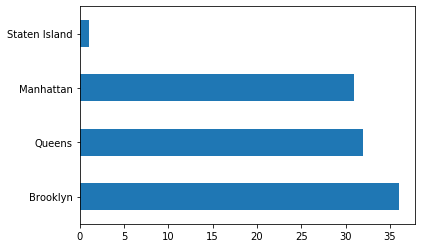

In [49]:
# Rooms with top 100 reviews by neighbourhood
dfr=df.sort_values(by=['number_of_reviews'],ascending=False).head(100)
dfr['neighbourhood_group'].value_counts().plot(kind = 'barh')

#### <font color='darkblue'>Inference:</font>

If we look at the top 100 airbnb's with number of reviews, Brooklyn has highest reviews followed by Queens and then Manhattan.

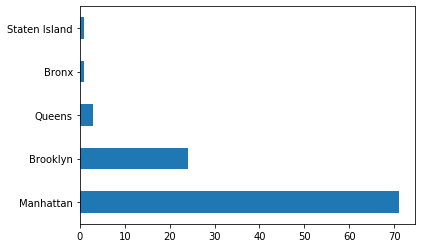

In [50]:
# Rooms with top 100 expensive by neighbourhood
dfr=df.sort_values(by=['price'],ascending=False).head(100)
dfr['neighbourhood_group'].value_counts().plot(kind = 'barh')

#### <font color='darkblue'>Inference:</font>

If we take the top 100 airbnbs then almost 70+ comes in Manhattan, followed by 25 in Brooklyn.

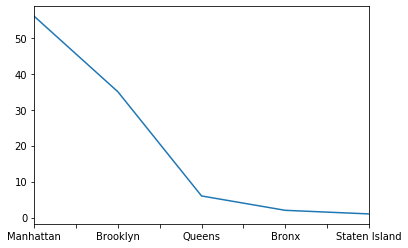

In [51]:
# Rooms with top 100 minimum_nights  by neighbourhood
dfr=df.sort_values(by=['minimum_nights'],ascending=False).head(100)
dfr['neighbourhood_group'].value_counts().plot()

Manhattan has highest airbnbs with highest minimum nights.

Text(0.5, 1.0, 'Room Type vs Price vs Neighbourhood Group')

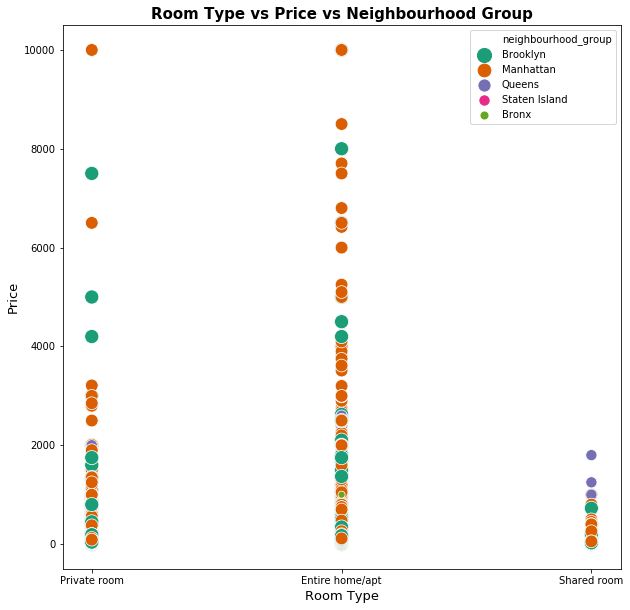

In [52]:
plt.figure(figsize=(10,10))
sns.scatterplot(x="room_type", y="price",
            hue="neighbourhood_group", size="neighbourhood_group",
            sizes=(50, 200), palette="Dark2", data=df)

plt.xlabel("Room Type", size=13)
plt.ylabel("Price", size=13)
plt.title("Room Type vs Price vs Neighbourhood Group",size=15, weight='bold')

### <font color='darkblue'>Data Cleaning</font>

We dont require host_id,name,id,host_name and last_review as these do not any way effect for further analysis or pre-processing. So we can drop them.

In [53]:
## We can remove the unwanted columns. Here id,name , host_name and last_review doesnt help us in anyway in our approch for data analysis.
df.drop(['host_id','name','latitude','longitude','id','host_name','last_review'], axis=1, inplace=True)
df.head()

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,Private room,149,1,9,0.21,6,365
1,Manhattan,Midtown,Entire home/apt,225,1,45,0.38,2,355
2,Manhattan,Harlem,Private room,150,3,0,NaN,1,365
3,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,4.64,1,194
4,Manhattan,East Harlem,Entire home/apt,80,10,9,0.10,1,0


Since we removed 4 columns from the dataframe, we now have to deal with 12 columns.

In [54]:
df.isna().sum()

neighbourhood_group                   0
neighbourhood                         0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [55]:
df['reviews_per_month'].describe()

count    38843.000000
mean         1.373221
std          1.680442
min          0.010000
25%          0.190000
50%          0.720000
75%          2.020000
max         58.500000
Name: reviews_per_month, dtype: float64

#### <font color='darkblue'>Inference:</font>

We can actually fill all the rows of column of reviews_per_month as 0 where its null value, this is because the data is null only because no one has reviewd it and hence the number of review is 0 here.

In [56]:
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)
# Missing value implies there are no reviews for the location.

In [57]:
df.isna().sum()

neighbourhood_group               0
neighbourhood                     0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

#### <font color='darkblue'>Inference:</font>

In the availablity_365 , if we have 365 days availablity then we can directly assgn them as 365 itself and 0 for rest because they isnt availavle for 365 days.

<a id='Data_Encoding'></a>
## <font color='darkblue'>3.3. Encoding Data and Outlier removal.</font>

We can first see the box plot of the price and find some outliers and remove them so that we can do better in further steps.

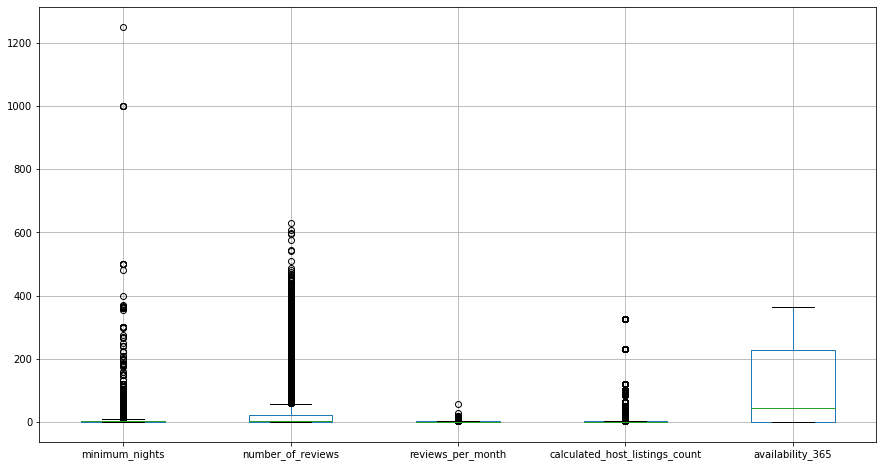

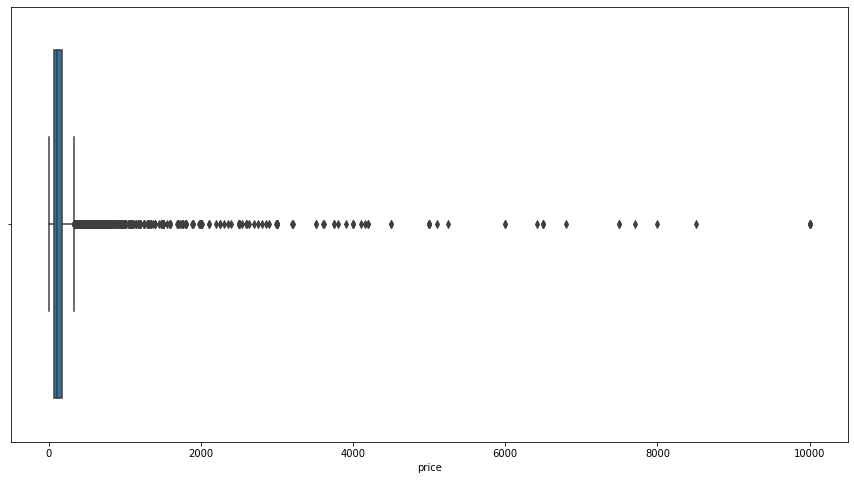

In [58]:
df = pd.read_csv('AB_NYC_2019.csv')
plt.rcParams['figure.figsize']=(15,8)

# recheck for outliers
# column: selects the specifies columns
df.boxplot(column=['minimum_nights',
 'number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365'])                  

# display only the plot
plt.show()
fig=sns.boxplot(df['price'])
fig

In [59]:
df_numeric_features=df.select_dtypes(include=np.number)
Q1 = df_numeric_features.drop(['price'], axis=1).quantile(0.25)

# compute the first quartile using quantile(0.75)
# use .drop() to drop the target variable 
# axis=1: specifies that the labels are dropped from the columns
Q3 = df_numeric_features.drop(['price'], axis=1).quantile(0.75)

# calculate of interquartile range 
IQR = Q3 - Q1

# print the IQR values for numeric variables
print(IQR)

id                                1.968023e+07
host_id                           9.961239e+07
latitude                          7.301500e-02
longitude                         4.679500e-02
minimum_nights                    4.000000e+00
number_of_reviews                 2.300000e+01
reviews_per_month                 1.830000e+00
calculated_host_listings_count    1.000000e+00
availability_365                  2.270000e+02
dtype: float64


#### <font color='darkblue'>Inference:</font>

Here, we can see that there are a lot of outliers taking up the data, it could be expensive Airbnbs, but there are a very few of them compared to data and it overall has a huge impact and must be removed.

In [60]:
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [61]:
df.shape

(29610, 16)

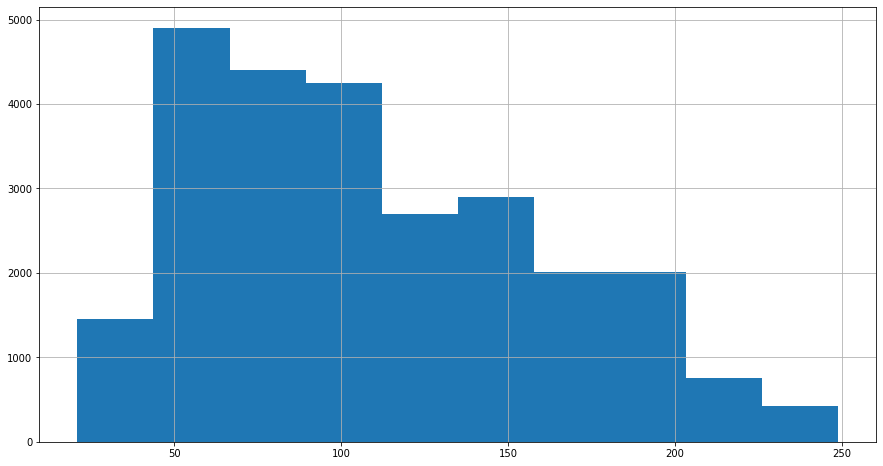

In [63]:
dfp = df["price"][df["price"] < 250]
dfp[dfp > 20].hist()


#### <font color='darkblue'>Inference:</font>

After experimenting around values the range of (20,250) has a good gaussian wise distribution and hence we can go ahead with data in this range and remove others as outliers.

In [64]:
df=df[df["price"]<250]
df=df[df["price"]>20]
# df['room_type'].value_counts()


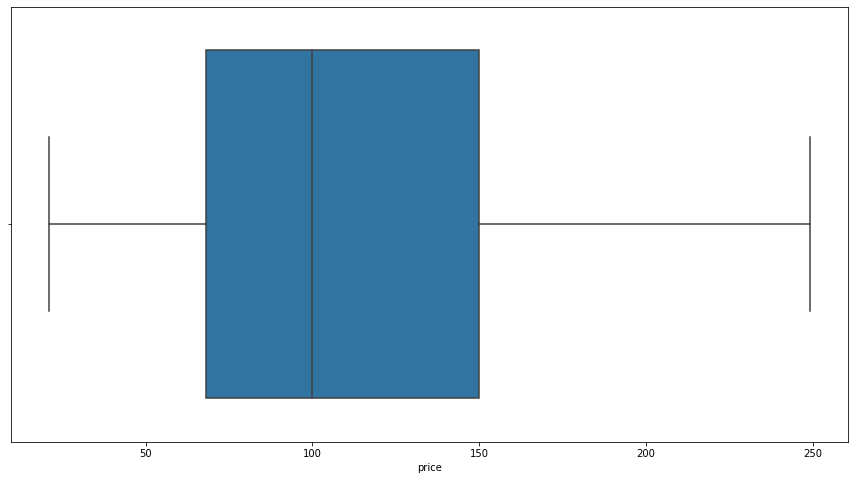

In [65]:
fig = sns.boxplot(df["price"])
fig

#### <font color='darkblue'>Inference:</font>

This is the final price data on which we are performing the rest of operations.

In [66]:
df.fillna({'reviews_per_month':0}, inplace=True)
df.drop(['id','host_id','latitude','longitude','host_name','last_review','name'], axis = 1,inplace=True)
df = pd.get_dummies(df, columns=['neighbourhood_group',"room_type"], prefix = ['ng',"rt"],drop_first=True)
df.drop(["neighbourhood"], axis=1, inplace=True)
df.head()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,ng_Brooklyn,ng_Manhattan,ng_Queens,rt_Private room,rt_Shared room
1,225,1,45,0.38,2,355,0,1,0,0,0
2,150,3,0,0.00,1,365,0,1,0,1,0
4,80,10,9,0.10,1,0,0,1,0,0,0
10,135,5,53,0.43,1,6,0,1,0,0,0
18,99,3,53,4.44,1,21,1,0,0,0,0


We performed an Encoding on neighbourhood and room type and removed some unwanted columns.

Text(0.5, 1, 'Correlation Matrix')

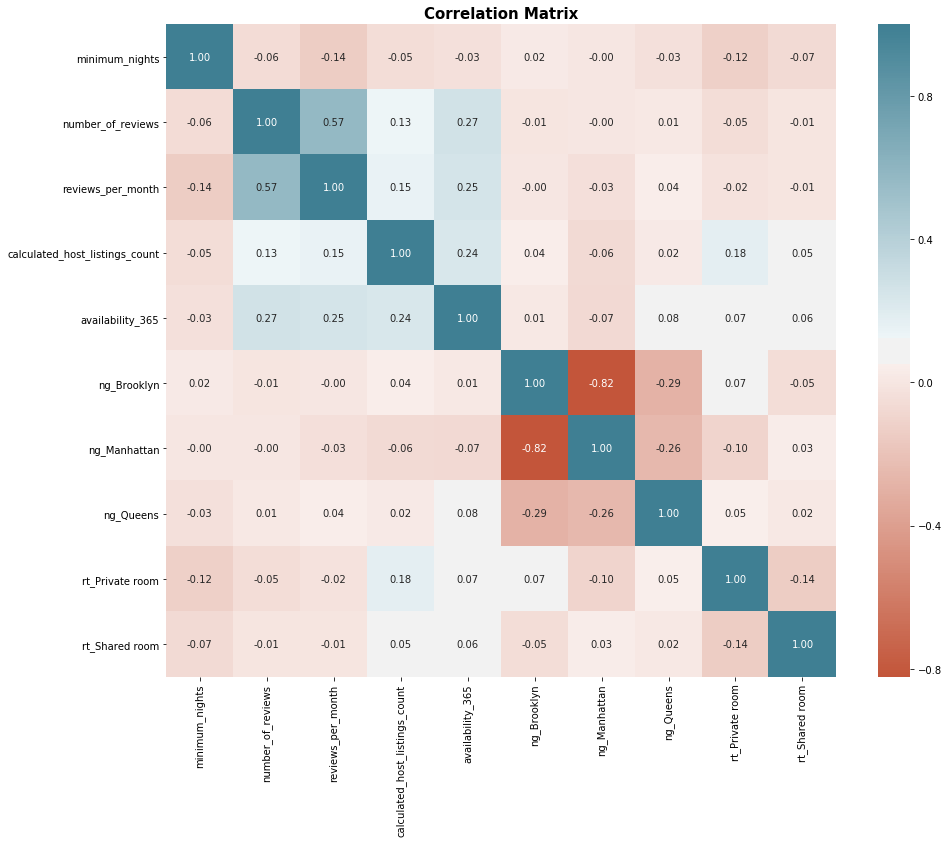

In [67]:
plt.figure(figsize=(15,12))
palette = sns.diverging_palette(20, 220, n=256)
corr=df.corr(method='pearson').drop(["price"], axis = 1)
corr=corr.drop(["price"])
sns.heatmap(corr, annot=True, fmt=".2f", cmap=palette)
plt.title("Correlation Matrix",size=15, weight='bold')

#### <font color='darkblue'>Inference:</font>

The correlation table shows that there is no strong relationship between price and other features. This indicates no feature needed to be taken out of data. 

<a id='LinearRegression'></a>
## 4. LINEAR-REGRESSION(OLS) 

<a id='withLog'></a>
## <font color='darkblue'>4.1. LINEAR-REGRESSION(OLS) with log transformed Target</font>

Text(0.5, 1.0, 'Price Distribution Plot')

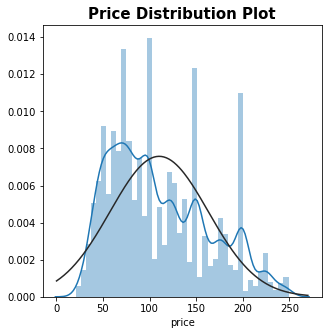

In [68]:
plt.figure(figsize=(5,5))
sns.distplot(df['price'], fit=norm)
plt.title("Price Distribution Plot",size=15, weight='bold')

#### <font color='darkblue'>Inference:</font>

The above distribution graph shows that there is a right-skewed distribution on price. This means there is a positive skewness. Log transformation will be used to make this feature less skewed. 

In [69]:
df.head()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,ng_Brooklyn,ng_Manhattan,ng_Queens,rt_Private room,rt_Shared room
1,225,1,45,0.38,2,355,0,1,0,0,0
2,150,3,0,0.00,1,365,0,1,0,1,0
4,80,10,9,0.10,1,0,0,1,0,0,0
10,135,5,53,0.43,1,6,0,1,0,0,0
18,99,3,53,4.44,1,21,1,0,0,0,0


In [70]:
df1=df.copy()

In [71]:
df1['price_log'] = np.log(df.price+1)
df1=df1.drop(["price"],axis=1)

Text(0.5, 1.0, 'Log-Price Distribution Plot')

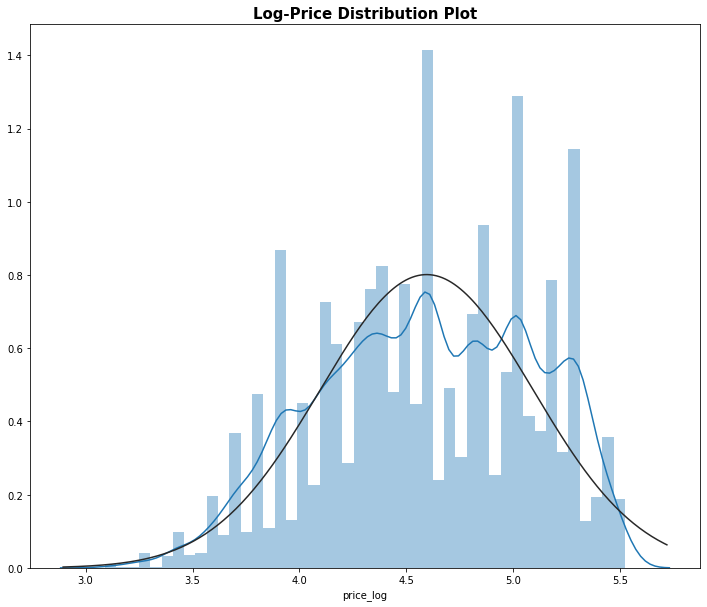

In [72]:
plt.figure(figsize=(12,10))
sns.distplot(df1['price_log'], fit=norm)
plt.title("Log-Price Distribution Plot",size=15, weight='bold')

#### <font color='darkblue'>Inference:</font>

With help of log transformation, now, price feature have normal distribution.

In [73]:
X = df1.drop(['price_log'],axis=1)
y = df1[['price_log']]
X=sm.add_constant(X)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)
X_train_log,X_test_log,y_train_log,y_test_log=X_train,X_test,y_train,y_test
MLR=sm.OLS(y_train,X_train).fit()
MLR.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.490
Model:                            OLS   Adj. R-squared:                  0.490
Method:                 Least Squares   F-statistic:                     1733.
Date:                Tue, 23 Feb 2021   Prob (F-statistic):               0.00
Time:                        11:10:09   Log-Likelihood:                -6975.4
No. Observations:               18055   AIC:                         1.397e+04
Df Residuals:                   18044   BIC:                         1.406e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              4.6644      0.024    190.871      0.000       4.616       4.712
minimum_nights                    -0.0133      0.001     -9.703      0.000      -0.016      -0.011
number_of_reviews                 -0.0005      0.000     -2.162      0.031      -0.001    -4.9e-05
reviews_per_month                 -0.0055      0.003     -1.598      0.110      -0.012       0.001
calculated_host_listings_count    -0.0046      0.005     -0.901      0.368      -0.015       0.005
availability_365                   0.0005   2.66e-05     18.504      0.000       0.000       0.001
ng_Brooklyn                        0.2068      0.023      8.893      0.000       0.161       0.252
ng_Manhattan                       0.4318      0.023     18.500      0.000       0.386       0.478
ng_Queens                          0.1449      0.025      5.886      0.000       0.097       0.193
rt_Private room                   -0.6332      0.006   -113.814      0.000      -0.644      -0.622
rt_Shared room                    -0.8360      0.020    -41.836      0.000      -0.875      -0.797
==============================================================================
Omnibus:                       28.682   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.856
Skew:                           0.028   Prob(JB):                     4.45e-08
Kurtosis:                       3.205   Cond. No.                     2.18e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.18e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### <font color='darkblue'>Inference:</font>

We used 30% of the data for testing and fitting it to the linear model which we generated using the rest off the data.This model explains 49% of the variation in dependent variable price.The Durbin-Watson test statistics is 2.013 indicates that there is no autocorrelation. The Condition Number 2.95e+03 suggests that there is strong multicollinearity.

In [74]:
def get_train_rmse(model):
    
    # For training set:
    # train_pred: prediction made by the model on the training dataset 'X_train'
    # y_train: actual values ofthe target variable for the train dataset

    # predict the output of the target variable from the train data 
    train_pred = model.predict(X_train)

    # calculate the MSE using the "mean_squared_error" function

    # MSE for the train data
    mse_train = mean_squared_error(y_train, train_pred)

    # take the square root of the MSE to calculate the RMSE
    # round the value upto 4 digits using 'round()'
    rmse_train = round(np.sqrt(mse_train), 4)
    
    # return the training RMSE
    return(rmse_train)

In [75]:
def get_test_rmse(model):
    
    # For testing set:
    # test_pred: prediction made by the model on the test dataset 'X_test'
    # y_test: actual values of the target variable for the test dataset

    # predict the output of the target variable from the test data
    test_pred = model.predict(X_test)

    # MSE for the test data
    mse_test = mean_squared_error(y_test, test_pred)

    # take the square root of the MSE to calculate the RMSE
    # round the value upto 4 digits using 'round()'
    rmse_test = round(np.sqrt(mse_test), 4)

    # return the test RMSE
    return(rmse_test)

In [76]:
print('RMSE on train set: ', get_train_rmse(MLR))
print('RMSE on test set: ', get_test_rmse(MLR))
difference = abs(get_test_rmse(MLR) - get_train_rmse(MLR))


RMSE on train set:  0.3561
RMSE on test set:  0.3543


In [77]:
MLR_predict =MLR.predict(X_test)
MLR_predict


15744    4.847246
9402     4.951908
30668    4.890262
7188     4.242305
17430    4.212561
           ...   
31397    4.443863
32169    4.972911
20373    4.429577
32125    5.081266
45054    4.355060
Length: 7738, dtype: float64

In [78]:
actual_price =y_test['price_log']
actual_price

15744    5.081404
9402     5.111988
30668    5.017280
7188     4.330733
17430    4.025352
           ...   
31397    4.615121
32169    5.017280
20373    3.931826
32125    5.303305
45054    4.007333
Name: price_log, Length: 7738, dtype: float64

In [79]:
linreg_full_model_rmse = rmse(actual_price, MLR_predict)
print(linreg_full_model_rmse)
linreg_full_model_rsquared = MLR.rsquared
linreg_full_model_rsquared_adj = MLR.rsquared_adj 

0.35429636654605773


In [80]:
# create dataframe 'score_card'
# columns: specifies the columns to be selected
score_card = pd.DataFrame(columns=['Model_Name', 'R-Squared', 'Adj. R-Squared', 'RMSE'])

# print the score card
score_card

,Model_Name,R-Squared,Adj. R-Squared,RMSE


In [81]:
linreg_full_model_metrics = pd.Series({
                     'Model_Name': "Linreg full model with log of target variable",
                     'RMSE':linreg_full_model_rmse,
                     'R-Squared': linreg_full_model_rsquared,
                     'Adj. R-Squared': linreg_full_model_rsquared_adj     
                   })
score_card = score_card.append(linreg_full_model_metrics, ignore_index=True)
score_card

,Model_Name,R-Squared,Adj. R-Squared,RMSE
0,Linreg full model with log of target variable,0.489896,0.489614,0.354296


In [82]:
linreg_full_model_pvalues = pd.DataFrame(MLR.pvalues, columns=["P-Value"])
linreg_full_model_pvalues

,P-Value
const,0.000000e+00
minimum_nights,3.321404e-22
number_of_reviews,3.064410e-02
reviews_per_month,1.101262e-01
calculated_host_listings_count,3.677403e-01
availability_365,9.616203e-76
ng_Brooklyn,6.476832e-19
ng_Manhattan,1.029907e-75
ng_Queens,4.014748e-09
rt_Private room,0.000000e+00


In [83]:
insignificant_variables = linreg_full_model_pvalues[(linreg_full_model_pvalues['P-Value']  > 0.05)]
insigni_var = insignificant_variables.index
insigni_var = insigni_var.to_list()
insigni_var

['reviews_per_month', 'calculated_host_listings_count']

#### <font color='darkblue'>Inference:</font>

These are the insignificant variables because their p-value is greater than 0.05.
There are redundant variables in calculated_host_listings_count and neighbourhood_group.

<a id='withoutLog'></a>
## <font color='darkblue'>4.2. Multiple Linear Regression - Full Model - without log Transformed Dependent Variable (OLS)</font>

In [84]:
X=df.drop(['price'],axis=1)
y=df[['price']]
X=sm.add_constant(X)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)
MLR2=sm.OLS(y_train,X_train).fit()
MLR2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.466
Model:                            OLS   Adj. R-squared:                  0.466
Method:                 Least Squares   F-statistic:                     1577.
Date:                Tue, 23 Feb 2021   Prob (F-statistic):               0.00
Time:                        11:10:10   Log-Likelihood:                -91542.
No. Observations:               18055   AIC:                         1.831e+05
Df Residuals:                   18044   BIC:                         1.832e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                            121.4874      2.644     45.953      0.000     116.305     126.669
minimum_nights                    -1.2182      0.149     -8.197      0.000      -1.509      -0.927
number_of_reviews                 -0.0865      0.026     -3.291      0.001      -0.138      -0.035
reviews_per_month                 -0.5049      0.374     -1.349      0.177      -1.239       0.229
calculated_host_listings_count    -0.4562      0.550     -0.829      0.407      -1.534       0.622
availability_365                   0.0525      0.003     18.211      0.000       0.047       0.058
ng_Brooklyn                       17.2523      2.516      6.858      0.000      12.321      22.183
ng_Manhattan                      40.3564      2.525     15.983      0.000      35.407      45.306
ng_Queens                         10.4373      2.662      3.921      0.000       5.219      15.655
rt_Private room                  -65.8260      0.602   -109.360      0.000     -67.006     -64.646
rt_Shared room                   -79.1087      2.162    -36.595      0.000     -83.346     -74.871
==============================================================================
Omnibus:                     1153.314   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1437.680
Skew:                           0.619   Prob(JB):                         0.00
Kurtosis:                       3.617   Cond. No.                     2.18e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.18e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### <font color='darkblue'>Inference:</font>

This model explains 46.6% of the variation in dependent variable price.The Durbin-Watson test statistics is 2.003 indicates that there is no autocorrelation. The Condition Number 2.65e+03 suggests that there is strong multicollinearity.

In [85]:
print('RMSE on train set: ', get_train_rmse(MLR2))
print('RMSE on test set: ', get_test_rmse(MLR2))


RMSE on train set:  38.5219
RMSE on test set:  38.2383


In [86]:
MLR2_predict =MLR2.predict(X_test)
MLR2_predict

15744    136.165493
9402     148.234719
30668    140.042762
7188      81.060786
17430     70.131116
            ...    
31397     93.812545
32169    150.586738
20373     92.815252
32125    160.161271
45054     85.752682
Length: 7738, dtype: float64

In [87]:
actual_price = y_test['price']
actual_price

15744    160
9402     165
30668    150
7188      75
17430     55
        ... 
31397    100
32169    150
20373     50
32125    200
45054     54
Name: price, Length: 7738, dtype: int64

In [88]:
linreg_full_model_withoutlog_pvalues = pd.DataFrame(MLR2.pvalues, columns=["P-Value"])
linreg_full_model_withoutlog_pvalues

,P-Value
const,0.000000e+00
minimum_nights,2.627880e-16
number_of_reviews,9.999173e-04
reviews_per_month,1.774475e-01
calculated_host_listings_count,4.069399e-01
availability_365,1.922964e-73
ng_Brooklyn,7.222781e-12
ng_Manhattan,4.144749e-57
ng_Queens,8.864099e-05
rt_Private room,0.000000e+00


In [89]:
insignificant_variables = linreg_full_model_withoutlog_pvalues[linreg_full_model_withoutlog_pvalues['P-Value']  > 0.05]
insigni_var = insignificant_variables.index
insigni_var = insigni_var.to_list()
insigni_var

['reviews_per_month', 'calculated_host_listings_count']

In [90]:
linreg_full_model_withoutlog_rmse = rmse(actual_price, MLR2_predict)

linreg_full_model_withoutlog_rsquared = MLR2.rsquared

linreg_full_model_withoutlog_rsquared_adj = MLR2.rsquared_adj 

In [91]:
print(linreg_full_model_withoutlog_rmse)

38.238253980660765


In [92]:
linreg_full_model_withoutlog_metrics = pd.Series({
                     'Model_Name': "Linreg full model without log of target variable",
                     'RMSE':linreg_full_model_withoutlog_rmse,
                     'R-Squared': linreg_full_model_withoutlog_rsquared,
                     'Adj. R-Squared': linreg_full_model_withoutlog_rsquared_adj     
                   })
score_card = score_card.append(linreg_full_model_withoutlog_metrics, ignore_index=True)


In [93]:
score_card

,Model_Name,R-Squared,Adj. R-Squared,RMSE
0,Linreg full model with log of target variable,0.489896,0.489614,0.354296
1,Linreg full model without log of target variable,0.466359,0.466063,38.238254


#### <font color='darkblue'>Inference:</font>

On comparing the above models, it is seen that the R-squared and the Adjusted R-squared value for the model considering log transformation of the variable 'price' is higher than the other model. And, the RMSE value of the model without considering the log transformation is high. So, we continue with variable 'price' by opting for log transformation.

<a id='Finetuning'></a>
## <font color='darkblue'>4.3. Fine Tune Linear Regression Model (OLS)</font>

<a id='RemovingInsignificantVariable'></a>
### <font color='darkblue'>4.3.1. Linear Regression after Removing Insignificant Variable (OLS)</font>

In [94]:
df_significant = df1.drop(insigni_var, axis=1)
df_significant.head()

,minimum_nights,number_of_reviews,availability_365,ng_Brooklyn,ng_Manhattan,ng_Queens,rt_Private room,rt_Shared room,price_log
1,1,45,355,0,1,0,0,0,5.420535
2,3,0,365,0,1,0,1,0,5.017280
4,10,9,0,0,1,0,0,0,4.394449
10,5,53,6,0,1,0,0,0,4.912655
18,3,53,21,1,0,0,0,0,4.605170


In [95]:
df_significant = sm.add_constant(df_significant)

X = df_significant.drop(['price_log'], axis=1)
y = df_significant[["price_log"]]

X_train_significant, X_test_significant, y_train, y_test = train_test_split(X, y, random_state=1)

In [96]:
MLR3=sm.OLS(y_train,X_train_significant).fit()
MLR3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.491
Model:                            OLS   Adj. R-squared:                  0.491
Method:                 Least Squares   F-statistic:                     2331.
Date:                Tue, 23 Feb 2021   Prob (F-statistic):               0.00
Time:                        11:10:10   Log-Likelihood:                -7464.2
No. Observations:               19344   AIC:                         1.495e+04
Df Residuals:                   19335   BIC:                         1.502e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 4.6526      0.023    203.007      0.000       4.608       4.698
minimum_nights       -0.0130      0.001     -9.877      0.000      -0.016      -0.010
number_of_reviews    -0.0007      0.000     -3.380      0.001      -0.001      -0.000
availability_365      0.0005    2.5e-05     19.591      0.000       0.000       0.001
ng_Brooklyn           0.2119      0.022      9.438      0.000       0.168       0.256
ng_Manhattan          0.4364      0.023     19.369      0.000       0.392       0.481
ng_Queens             0.1449      0.024      6.098      0.000       0.098       0.191
rt_Private room      -0.6342      0.005   -120.071      0.000      -0.645      -0.624
rt_Shared room       -0.8432      0.019    -43.366      0.000      -0.881      -0.805
==============================================================================
Omnibus:                       29.867   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.169
Skew:                           0.028   Prob(JB):                     2.31e-08
Kurtosis:                       3.201   Cond. No.                     2.18e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.18e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### <font color='darkblue'>Inference:</font>

This model explains 49.1% of the variation in dependent variable claim.The Durbin-Watson test statistics is 2.007 indicates that there is no autocorrelation. The Condition Number 1.66e+18 suggests that there is strong multicollinearity.

In [97]:
MLR3_predict =MLR3.predict(X_test_significant)
MLR3_predict

15744    4.845547
9402     4.952523
30668    4.908902
7188     4.232790
17430    4.210056
           ...   
10986    4.190098
17560    4.441212
22117    4.348038
8139     4.217397
11865    5.162757
Length: 6449, dtype: float64

In [98]:
actual_price = y_test['price_log']
actual_price

15744    5.081404
9402     5.111988
30668    5.017280
7188     4.330733
17430    4.025352
           ...   
10986    4.189655
17560    4.262680
22117    4.615121
8139     4.330733
11865    5.192957
Name: price_log, Length: 6449, dtype: float64

In [99]:
linreg_model_with_significant_var_rmse = rmse(actual_price, MLR3_predict)
linreg_model_with_significant_var_rsquared =MLR3.rsquared
linreg_model_with_significant_var_rsquared_adj =MLR3.rsquared_adj 

In [100]:
linreg_model_with_significant_var_metrics = pd.Series({
                     'Model_Name': "Linreg full model with significant variables",
                     'RMSE': linreg_model_with_significant_var_rmse,
                     'R-Squared': linreg_model_with_significant_var_rsquared,
                     'Adj. R-Squared': linreg_model_with_significant_var_rsquared_adj     
                   })

score_card = score_card.append(linreg_model_with_significant_var_metrics, ignore_index=True)
score_card


,Model_Name,R-Squared,Adj. R-Squared,RMSE
0,Linreg full model with log of target variable,0.489896,0.489614,0.354296
1,Linreg full model without log of target variable,0.466359,0.466063,38.238254
2,Linreg full model with significant variables,0.490951,0.490740,0.354595


#### <font color='darkblue'>Inference:</font>

Our last model where we have removed the insignificant variables is performimg better than the other models.Hence we consider Linreg full model with significant variables.

<a id='Assumptions'></a>
### <font color='darkblue'>4.3.2. Check the Assumptions of the Linear Regression</font>

<a id='Autocorrelation'></a>
### <font color='darkblue'>4.3.2.1. Detecting Autocorrelation</font>

#### <font color='darkblue'>Inference:</font>

From the summary output from Linreg full model with significant variables,  we see that the Durbin-Watson static is 2.0
Hence we can conclude that there is no autocorrelation.

<a id='Heteroskedasticity'></a>
### <font color='darkblue'>4.3.2.2. Detecting Heteroskedasticity</font>

The null and alternate hypothesis of Breusch-Pagan test is as follows:

H0: The residuals are homoskedastic

H1: The residuals are not homoskedastic

In [101]:
name = ['f-value','p-value']           
test = sms.het_breuschpagan(MLR3.resid, MLR3.model.exog)
lzip(name, test) 

[('f-value', 482.0083809904909), ('p-value', 5.0880300510114e-99)]

#### <font color='darkblue'>Inference:</font>

We observe that p-value is less than 0.05 and thus reject the null hypothesis. We conclude that there is heteroskedasticity present in the data. In real life it might not be possible to meet all the assumptions of linear regression.

<a id='Linearity_of_Residuals'></a>
### <font color='darkblue'>4.3.2.3. Linearity of Residuals</font>

The independent variables must have a linear relationship with the dependent variable.

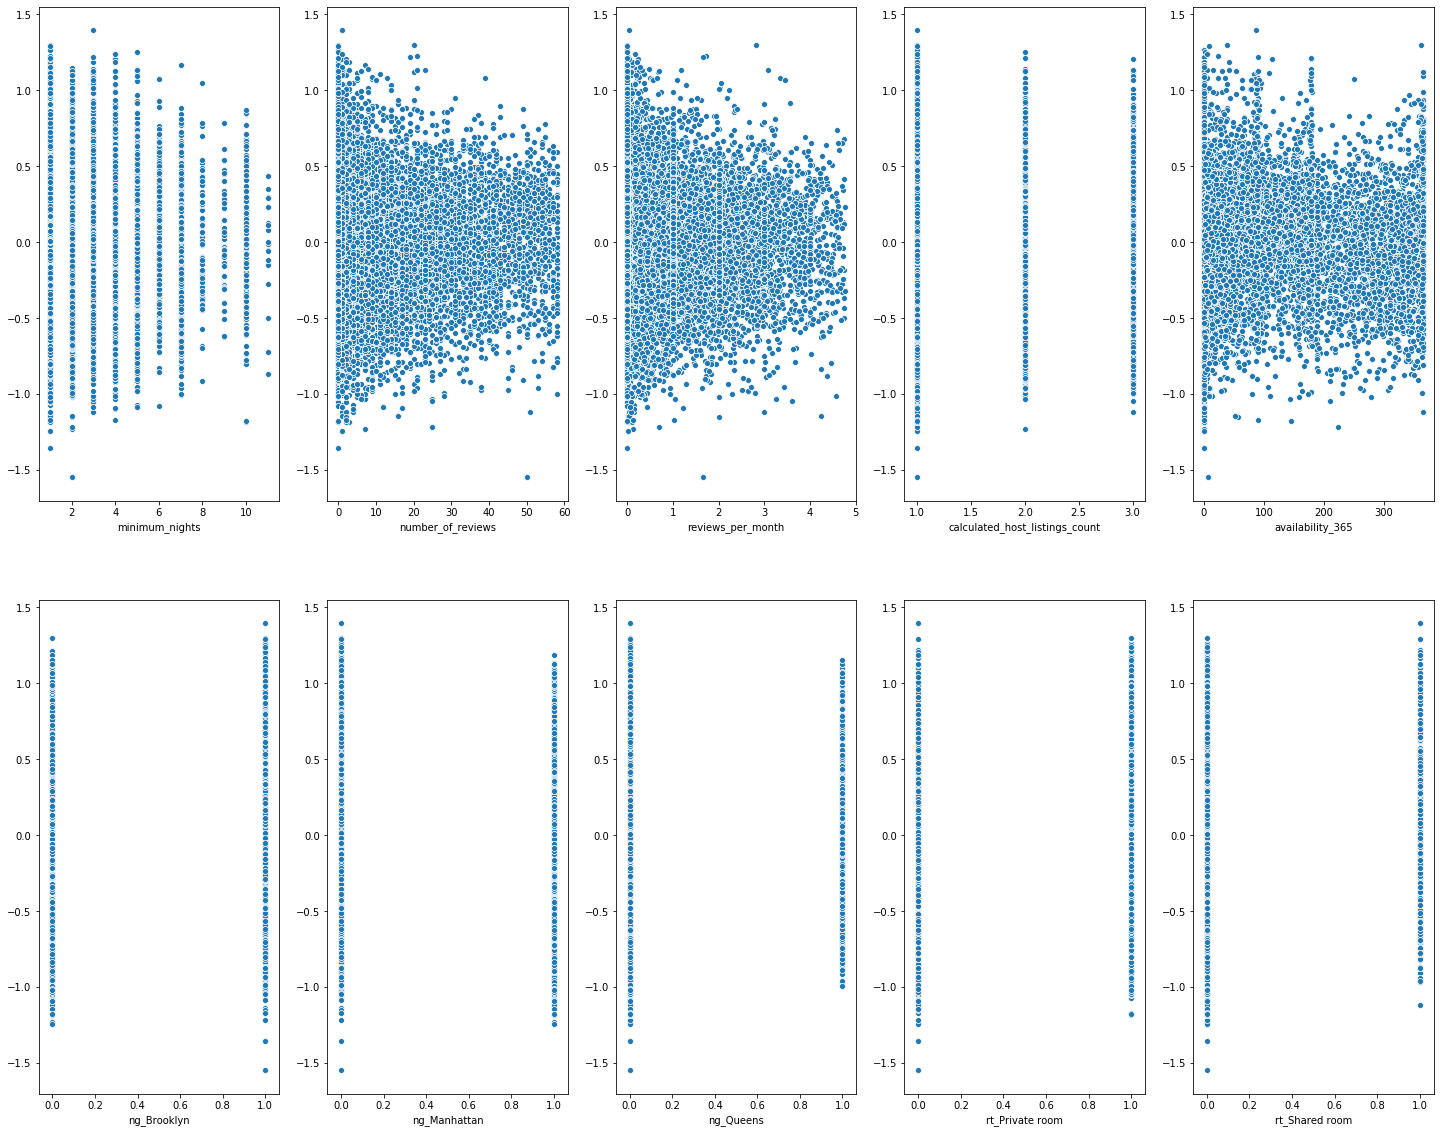

In [102]:
fig, ax = plt.subplots(nrows = 2, ncols= 5, figsize=(25, 20))
for variable, subplot in zip(X_train_log.columns[1:], ax.flatten()):
    sns.scatterplot(X_train_log[variable], MLR3.resid , ax=subplot)
plt.show()

#### <font color='darkblue'>Inference:</font>

From the plots we see that none of the plots show a specific pattern. Hence, we may conclude that the variables are linearly related to the dependent variable.

<a id='Normality_of_Residuals'></a>
### <font color='darkblue'>4.3.2.4. Normality of Residuals</font>

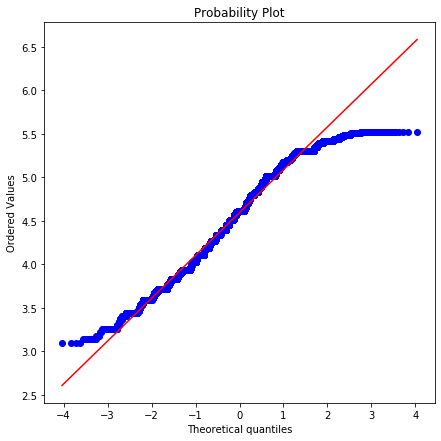

In [103]:
plt.figure(figsize=(7,7))
stats.probplot(df1['price_log'], plot=plt)
plt.show()

#### <font color='darkblue'>Inference:</font>

Using this plot, we can infer that the residuals do come from a normal distribution. This is possible since our target variable is normally distributed.

The good fit indicates that normality is a reasonable approximation.

In [104]:
MLR3.resid.mean()

1.3601232997147698e-13

#### <font color='darkblue'>Inference:</font>

The mean of the residuals is very much closer to zero. Therefore, we can say that linearity is present.

<a id='RemovingInsignificantVariable_scaleddata'></a>
## <font color='darkblue'>4.3.3. Linear Regression after Removing Insignificant Variable (OLS) - Scaled Data</font>

In [105]:
df_scaled = df1.apply(lambda rec: (rec - rec.mean()) / rec.std())
data_scaled =sm.add_constant(df_scaled)

In [106]:
mean_numeric_features = df1.mean()
std_numeric_features =df1.std()

In [107]:
X = data_scaled.drop(['price_log'], axis=1)
y = data_scaled['price_log']
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X, y, random_state=1)

In [108]:
linreg_model_with_significant_scaled_vars = sm.OLS(y_train_scaled,X_train_scaled).fit()
print(linreg_model_with_significant_scaled_vars.summary())

                            OLS Regression Results                            
Dep. Variable:              price_log   R-squared:                       0.491
Model:                            OLS   Adj. R-squared:                  0.491
Method:                 Least Squares   F-statistic:                     1866.
Date:                Tue, 23 Feb 2021   Prob (F-statistic):               0.00
Time:                        11:10:25   Log-Likelihood:                -20948.
No. Observations:               19344   AIC:                         4.192e+04
Df Residuals:                   19333   BIC:                         4.200e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

#### <font color='darkblue'>Inference:</font>

This model explains 49.1% of the variation in dependent variable price.The Durbin-Watson test statistics is 2.006 and indicates that the is no autocorrelation. The Condition Number is 6.82 suggests that there is no multicollinearity.

In [109]:
predicted_price = linreg_model_with_significant_scaled_vars.predict(X_test_scaled)
actual_price = y_test['price_log']

In [110]:
linreg_model_with_significant_scaled_vars_rmse = rmse(actual_price, predicted_price)
linreg_model_with_significant_scaled_vars_rsquared = linreg_model_with_significant_scaled_vars.rsquared
linreg_model_with_significant_scaled_vars_rsquared_adj = linreg_model_with_significant_scaled_vars.rsquared_adj

In [111]:
linreg_model_with_significant_scaled_vars_metrics = pd.Series({
                     'Model_Name': "Linreg with scaled significant variables",
                     'RMSE': linreg_model_with_significant_scaled_vars_rmse,
                     'R-Squared': linreg_model_with_significant_scaled_vars_rsquared,
                     'Adj. R-Squared': linreg_model_with_significant_scaled_vars_rsquared_adj     
                   })
score_card = score_card.append(linreg_model_with_significant_scaled_vars_metrics, ignore_index = True)
score_card

,Model_Name,R-Squared,Adj. R-Squared,RMSE
0,Linreg full model with log of target variable,0.489896,0.489614,0.354296
1,Linreg full model without log of target variable,0.466359,0.466063,38.238254
2,Linreg full model with significant variables,0.490951,0.490740,0.354595
3,Linreg with scaled significant variables,0.491095,0.490831,4.613185


#### <font color='darkblue'>Inference:</font>

On comparing the above models, it is seen that the RMSE value for the model considering scaled data is higher than the other model.So, for further analysis we use the unscaled data.

<a id='Interaction'></a>
## <font color='darkblue'>4.3.4. Linear Regression with Interaction (OLS)</font>

In [112]:
df

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,ng_Brooklyn,ng_Manhattan,ng_Queens,rt_Private room,rt_Shared room
1,225,1,45,0.38,2,355,0,1,0,0,0
2,150,3,0,0.00,1,365,0,1,0,1,0
4,80,10,9,0.10,1,0,0,1,0,0,0
10,135,5,53,0.43,1,6,0,1,0,0,0
18,99,3,53,4.44,1,21,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
48887,170,1,0,0.00,3,365,1,0,0,0,0
48890,70,2,0,0.00,2,9,1,0,0,1,0
48891,40,4,0,0.00,2,36,1,0,0,1,0
48892,115,10,0,0.00,1,27,0,1,0,0,0


In [113]:
df_interaction = df1.copy()
df_interaction['number_of_reviews*minimum_nights'] = df_interaction['number_of_reviews']*df_interaction['minimum_nights'] 
df_interaction.head()

,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,ng_Brooklyn,ng_Manhattan,ng_Queens,rt_Private room,rt_Shared room,price_log,number_of_reviews*minimum_nights
1,1,45,0.38,2,355,0,1,0,0,0,5.420535,45
2,3,0,0.00,1,365,0,1,0,1,0,5.017280,0
4,10,9,0.10,1,0,0,1,0,0,0,4.394449,90
10,5,53,0.43,1,6,0,1,0,0,0,4.912655,265
18,3,53,4.44,1,21,1,0,0,0,0,4.605170,159


In [114]:
X = df_interaction.drop(['price_log'], axis=1)
y = df_interaction['price_log']
X=sm.add_constant(X)
X_train_interaction, X_test_interaction, y_train, y_test = train_test_split( X, y, random_state=1)

In [115]:
linreg_with_interaction = sm.OLS(y_train, X_train_interaction).fit()
print(linreg_with_interaction.summary())

                            OLS Regression Results                            
Dep. Variable:              price_log   R-squared:                       0.491
Model:                            OLS   Adj. R-squared:                  0.491
Method:                 Least Squares   F-statistic:                     1698.
Date:                Tue, 23 Feb 2021   Prob (F-statistic):               0.00
Time:                        11:10:25   Log-Likelihood:                -7455.4
No. Observations:               19344   AIC:                         1.493e+04
Df Residuals:                   19332   BIC:                         1.503e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

#### <font color='darkblue'>Inference:</font>

This model explains 88.9% of the variation in dependent variable claim.The Durbin-Watson test statistics is 2.003 and indicates that the is no autocorrelation. The Condition Number is 3.04e+03 suggests that there is strong multicollinearity. The collinearity is likely to increase because of the interaction effect.

In [116]:
predicted_price = linreg_with_interaction.predict(X_test_interaction)
actual_price = y_test

In [117]:
linreg_with_interaction_rmse = rmse(actual_price, predicted_price)
linreg_with_interaction_rsquared = linreg_with_interaction.rsquared
linreg_with_interaction_rsquared_adj = linreg_with_interaction.rsquared_adj 

In [118]:
linreg_with_interaction_metrics = pd.Series({
                     'Model_Name': "linreg_with_interaction",
                     'RMSE': linreg_with_interaction_rmse,
                     'R-Squared': linreg_with_interaction_rsquared,
                     'Adj. R-Squared': linreg_with_interaction_rsquared_adj     
                   })
score_card = score_card.append(linreg_with_interaction_metrics, ignore_index = True)
score_card

,Model_Name,R-Squared,Adj. R-Squared,RMSE
0,Linreg full model with log of target variable,0.489896,0.489614,0.354296
1,Linreg full model without log of target variable,0.466359,0.466063,38.238254
2,Linreg full model with significant variables,0.490951,0.490740,0.354595
3,Linreg with scaled significant variables,0.491095,0.490831,4.613185
4,linreg_with_interaction,0.491413,0.491124,0.354387


<a id='regularization'></a>
## 5. Regularization (OLS)

<a id='Ridge_Regression'></a>
## <font color='darkblue'>5.1. Ridge Regression (OLS)</font>

In [119]:
col = list(X_train_scaled.columns)
col.append('ssr')
col.append('R squared')
col.append('Adj. R squared')
col.append('RMSE')

In [120]:
ridge_regression = sm.OLS(y_train_scaled, X_train_scaled)
results_fu = ridge_regression.fit()

In [121]:
frames = []
for n in np.arange(0.0001,10.1, 0.1).tolist():

    results_fr = ridge_regression.fit_regularized(L1_wt=0, alpha=n, start_params=results_fu.params)
    results_fr_fit = sm.regression.linear_model.OLSResults(model=ridge_regression, 
                                             params=results_fr.params, 
                                             normalized_cov_params=ridge_regression.normalized_cov_params)
   
    results_fr_fit_predictions = results_fr_fit.predict(X_test_scaled)
    results_fr_fit_rmse = rmse(y_test, results_fr_fit_predictions)    
  
    list_metric = [results_fr_fit.ssr, results_fr_fit.rsquared, results_fr_fit.rsquared_adj, results_fr_fit_rmse]
    
   
    frames.append(np.append(results_fr.params, list_metric))
    

    df_params = pd.DataFrame(frames, columns= col)

# add column names to the dataframe  
df_params.index=np.arange(0.0001, 10.1, 0.1).tolist()

# add the first column name alpha to the data frame. 
# this column will hold the regularization parameter value which can be anything from zero to any positive number
df_params.index.name = 'alpha*'

# display the output
df_params


,const,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,ng_Brooklyn,ng_Manhattan,ng_Queens,rt_Private room,rt_Shared room,ssr,R squared,Adj. R squared,RMSE
alpha*,,,,,,,,,,,,,,,
0.0001,0.003727,-0.052983,-0.011017,-0.012170,-0.006823,0.108644,0.209833,0.429115,0.078825,-0.635604,-0.228554,9877.939498,0.491094,0.490831,4.613169
0.1001,0.003834,-0.037496,-0.002818,-0.008776,-0.016286,0.088170,-0.027166,0.186433,-0.049373,-0.571259,-0.197637,10028.669831,0.483329,0.483062,4.607030
0.2001,0.003631,-0.027270,0.001703,-0.005003,-0.022308,0.075050,-0.049510,0.156567,-0.058824,-0.518760,-0.173279,10245.486369,0.472159,0.471886,4.603988
0.3001,0.003420,-0.019893,0.004736,-0.002324,-0.026220,0.065010,-0.056497,0.142236,-0.060098,-0.475575,-0.154036,10505.090350,0.458784,0.458504,4.602043
0.4001,0.003219,-0.014417,0.006818,-0.000420,-0.028757,0.057064,-0.059076,0.132639,-0.059232,-0.439364,-0.138490,10781.878869,0.444524,0.444237,4.600776
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9.6001,0.000414,0.003415,0.003752,0.001665,-0.010434,0.002663,-0.016706,0.025138,-0.011124,-0.057706,-0.012417,17563.076825,0.095161,0.094693,4.609143
9.7001,0.000410,0.003390,0.003719,0.001651,-0.010346,0.002631,-0.016567,0.024922,-0.011024,-0.057170,-0.012293,17578.891979,0.094346,0.093877,4.609188
9.8001,0.000406,0.003366,0.003688,0.001637,-0.010261,0.002599,-0.016430,0.024709,-0.010927,-0.056644,-0.012172,17594.438742,0.093545,0.093076,4.609233


In [122]:
df_params.iloc[[0,1,3,4,5,-2,-1]]

,const,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,ng_Brooklyn,ng_Manhattan,ng_Queens,rt_Private room,rt_Shared room,ssr,R squared,Adj. R squared,RMSE
alpha*,,,,,,,,,,,,,,,
0.0001,0.003727,-0.052983,-0.011017,-0.012170,-0.006823,0.108644,0.209833,0.429115,0.078825,-0.635604,-0.228554,9877.939498,0.491094,0.490831,4.613169
0.1001,0.003834,-0.037496,-0.002818,-0.008776,-0.016286,0.088170,-0.027166,0.186433,-0.049373,-0.571259,-0.197637,10028.669831,0.483329,0.483062,4.607030
0.3001,0.003420,-0.019893,0.004736,-0.002324,-0.026220,0.065010,-0.056497,0.142236,-0.060098,-0.475575,-0.154036,10505.090350,0.458784,0.458504,4.602043
0.4001,0.003219,-0.014417,0.006818,-0.000420,-0.028757,0.057064,-0.059076,0.132639,-0.059232,-0.439364,-0.138490,10781.878869,0.444524,0.444237,4.600776
0.5001,0.003034,-0.010265,0.008259,0.000948,-0.030371,0.050634,-0.059832,0.125224,-0.057623,-0.408515,-0.125688,11061.268414,0.430130,0.429835,4.599955
9.9001,0.000402,0.003341,0.003657,0.001622,-0.010176,0.002568,-0.016296,0.024499,-0.010831,-0.056128,-0.012053,17609.723886,0.092757,0.092288,4.609277
10.0001,0.000398,0.003318,0.003626,0.001609,-0.010093,0.002537,-0.016163,0.024293,-0.010736,-0.055621,-0.011936,17624.753955,0.091983,0.091513,4.609321


#### <font color='darkblue'>Inference:</font>

The sum of squares of residual, increases with increase in alpha, this reduces model complexity. Compare the coefficients in the first and second row of this table, there is a drastic change in the magnitude of coefficients. Similar change is seen on comparing rows 2 and 3. However, there is not much change in rows 3 and 4. High alpha values can lead to significant underfitting and there is a increase in residual sum of squares.

In [123]:
alpha = df_params.RMSE[df_params.RMSE == df_params.loc[:,'RMSE'].min()].index.tolist()
print('The required alpha is %.4f ' % (alpha[0]))

The required alpha is 0.9001 


#### <font color='darkblue'>Inference:</font>

Thus, we may say the model obtained by alpha = 0.9001 is performing the best since has the lowest root mean squared error.

In [124]:
results_fr = ridge_regression.fit_regularized(L1_wt=0, alpha=0.9001, start_params=results_fu.params)
ridge_regression_best = sm.regression.linear_model.OLSResults(model = ridge_regression, 
                                        params=results_fr.params, 
                                        normalized_cov_params=ridge_regression.normalized_cov_params)

print (ridge_regression_best.summary())

                            OLS Regression Results                            
Dep. Variable:              price_log   R-squared:                       0.377
Model:                            OLS   Adj. R-squared:                  0.377
Method:                 Least Squares   F-statistic:                     1169.
Date:                Tue, 23 Feb 2021   Prob (F-statistic):               0.00
Time:                        11:10:29   Log-Likelihood:                -22906.
No. Observations:               19344   AIC:                         4.583e+04
Df Residuals:                   19333   BIC:                         4.592e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

#### <font color='darkblue'>Inference:</font>

This model explains 49.1% of the variation in dependent variable claim. The Durbin-Watson test statistics is 2.014 which indicates that there is no autocorrelation. The Condition Number is 6.82 suggests that there is no collinearity.

In [125]:
predicted_price = ridge_regression_best.predict(X_test_scaled)
y_pred_unscaled = (predicted_price * std_numeric_features.price_log) + mean_numeric_features.price_log
actual_price = y_test


In [126]:
ridge_regression_best_rmse = rmse(actual_price, y_pred_unscaled)
ridge_regression_best_rsquared = ridge_regression_best.rsquared
ridge_regression_best_rsquared_adj = ridge_regression_best.rsquared_adj 

In [127]:
ridge_regression_best_metrics = pd.Series({
                     'Model_Name': "Ridge Regression",
                     'RMSE': ridge_regression_best_rmse,
                     'R-Squared': ridge_regression_best_rsquared,
                     'Adj. R-Squared': ridge_regression_best_rsquared_adj     
                   })
score_card = score_card.append(ridge_regression_best_metrics, ignore_index = True)
score_card

,Model_Name,R-Squared,Adj. R-Squared,RMSE
0,Linreg full model with log of target variable,0.489896,0.489614,0.354296
1,Linreg full model without log of target variable,0.466359,0.466063,38.238254
2,Linreg full model with significant variables,0.490951,0.490740,0.354595
3,Linreg with scaled significant variables,0.491095,0.490831,4.613185
4,linreg_with_interaction,0.491413,0.491124,0.354387
5,Ridge Regression,0.376867,0.376545,0.392597


<a id='LinearRegressionwithStochasticGradientDescent'></a>
## <font color='darkblue'>5.2. Linear Regression with SGD</font>

In [128]:
X=df.drop(['price'],axis=1)
y=df[['price']]
X=sm.add_constant(X)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [132]:
from sklearn.linear_model import SGDRegressor
linreg_with_SGD = SGDRegressor()
linreg_with_SGD = linreg_with_SGD.fit(X_train, y_train)

In [133]:
linreg_with_SGD_predictions = linreg_with_SGD.predict(X_test)

In [134]:

linreg_SGD_mse = mean_squared_error(y_test, linreg_with_SGD_predictions)

# calculate rmse
linreg_SGD_rmse = np.sqrt(linreg_SGD_mse)

# calculate R-squared
linreg_SGD_r_squared = r2_score(y_test, linreg_with_SGD_predictions)

# calculate Adjusted R-squared
linreg_SGD_adjusted_r_squared = 1 - (1-linreg_SGD_r_squared)*(len(y_test)-1)/(len(y_test)- X_test.shape[1]-1)

In [135]:
# compile the required information
linreg_full_model_SGD = pd.Series({
                     'Model_Name': "Linear Regression SGD",
                     'RMSE': linreg_SGD_rmse ,
                     'R-Squared': linreg_SGD_r_squared,
                     'Adj. R-Squared': linreg_SGD_adjusted_r_squared   
                   })

score_card = score_card.append(linreg_full_model_SGD, ignore_index = True)
score_card

,Model_Name,R-Squared,Adj. R-Squared,RMSE
0,Linreg full model with log of target variable,4.898963e-01,4.896136e-01,3.542964e-01
1,Linreg full model without log of target variable,4.663586e-01,4.660628e-01,3.823825e+01
2,Linreg full model with significant variables,4.909506e-01,4.907400e-01,3.545954e-01
3,Linreg with scaled significant variables,4.910945e-01,4.908313e-01,4.613185e+00
4,linreg_with_interaction,4.914130e-01,4.911236e-01,3.543870e-01
5,Ridge Regression,3.768673e-01,3.765450e-01,3.925974e-01
6,Linear Regression SGD,-6.649866e+21,-6.659334e+21,4.285557e+12


#### <font color='darkblue'>Inference:</font>

Notice that R-squared and Adjusted R-squared values are negative and RMSE value is very high. It can be infered that this model does not perform good

<a id='rmse_and_r-squared'></a>
## 6. Conclusion and Interpretation

In [136]:
score_card = score_card.drop(score_card.index[[6]])
score_card

,Model_Name,R-Squared,Adj. R-Squared,RMSE
0,Linreg full model with log of target variable,0.489896,0.489614,0.354296
1,Linreg full model without log of target variable,0.466359,0.466063,38.238254
2,Linreg full model with significant variables,0.490951,0.490740,0.354595
3,Linreg with scaled significant variables,0.491095,0.490831,4.613185
4,linreg_with_interaction,0.491413,0.491124,0.354387
5,Ridge Regression,0.376867,0.376545,0.392597


#### <font color='darkblue'>Conclusion:</font>

#### Findings suggest that the linear regression with interaction algorithm has the highest accuracy(49.1%) with RMSE of 0.35 which is the lowest compared to other models.Finally, it can be concluded that the linear regression with interaction algorithm  can be used by airbnb to predict the price of the airbnb.